In [359]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [360]:
data = pd.read_csv("penguins_size.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [361]:
data = data.ffill()

In [362]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [364]:
data.describe()
data['sex'] = data['sex'].replace('.', 'MALE') # in one row, there is a value '.', replaced it with MALE, bc there is more male penguins than female
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [365]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data['island'] = le.fit_transform(data['island'])
data['sex'] = le.fit_transform(data['sex'])

In [366]:
np.unique(data['island'])

array([0, 1, 2])

In [367]:
y = data['species']
X = data.drop(columns=['species'])

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

PCA

In [369]:
scaler = StandardScaler()

standarded_data_test_X = scaler.fit_transform(X_test)
standarded_data_train_X = scaler.fit_transform(X_train)

standarded_data_test_X = pd.DataFrame(data=standarded_data_test_X, columns=X.columns)
standarded_data_train_X = pd.DataFrame(data=standarded_data_train_X, columns=X.columns)

In [370]:
pca = PCA(n_components=4)

In [371]:
principal_components_train_X = pca.fit_transform(standarded_data_train_X)
principal_components_test_X = pca.fit_transform(standarded_data_test_X)

In [372]:
pca.explained_variance_ratio_

array([0.54083921, 0.24613987, 0.09252113, 0.07528704])

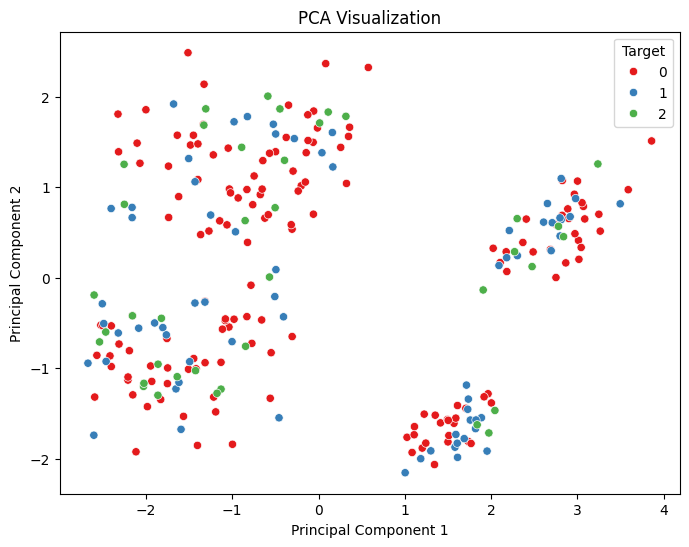

In [373]:
principal_df = pd.DataFrame(data=principal_components_train_X, columns=[f'PC{i}' for i in range(1, 5)])
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['species'])], axis=1)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=final_df, palette='Set1')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='upper right')
plt.show()

Classification

In [374]:
knn = KNeighborsClassifier(n_neighbors=2)

In [375]:
knn.fit(principal_components_train_X, y_train)

KNeighborsClassifier(n_neighbors=2)

In [376]:
pred = knn.predict(principal_components_test_X)

In [377]:
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix

array([[38,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 32]], dtype=int64)

In [378]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        32

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86
